In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [2]:
def plot_heatmap(dataframe, title=False, savename=False, fmt='d', annot=True, cbar=True):
    matplotlib.rcParams.update({'font.size': 30})

    fig, ax = plt.subplots(figsize=(30,40), dpi=100)
    hmp = sns.heatmap(ax=ax,
                data=dataframe,
                square=True,
                annot=annot,
                fmt=fmt,
                annot_kws={"size":8},
               cbar=cbar,cbar_kws=dict(use_gridspec=False,location="top", shrink=1)
               )
    if title:
        plt.title(title, fontsize=40)
    if savename:
        plt.savefig(savename, bbox_inches='tight')
    plt.show()

def sort_df(dataframe):
    cols = []
    for num in range(8,38):
        cols.append('515rcbc'+str(num))
    dataframe = dataframe.reindex(reversed(cols))
    return dataframe[cols]

def plot_bar(dataframe, metric, title=False, savename=False, dpi=100, ylabel=False, xlabel=False):
    matplotlib.rcParams.update({'font.size': 16})
    fig, ax = plt.subplots(figsize=(8,4))
    dataframe = dataframe.sort_values(metric, axis=0)
    plt.bar(dataframe.index, dataframe[metric], color='purple', width=0.8)
    plt.xticks(rotation=90)
    plt.ylabel(metric, fontsize=14)
    plt.xlim(0.4, len(dataframe.index)-0.4)
    ax.grid(axis='y')
    ax.set_axisbelow(True)
    if title:
        plt.title(title, fontsize=18)
    if xlabel:
        plt.xlabel(xlabel, fontsize=14)
    if ylabel:
        plt.ylabel(ylabel, fontsize=14)
    if savename:
        plt.savefig(savename, dpi=dpi, bbox_inches='tight')

    plt.show()


In [ ]:
!shared_phylotypes.py -i otu_table.biom -o shared_phylo.tsv

In [25]:
phylo = pd.read_csv('./shared_phylo.tsv', sep='\t', index_col=0)
phylo = sort_df(phylo)

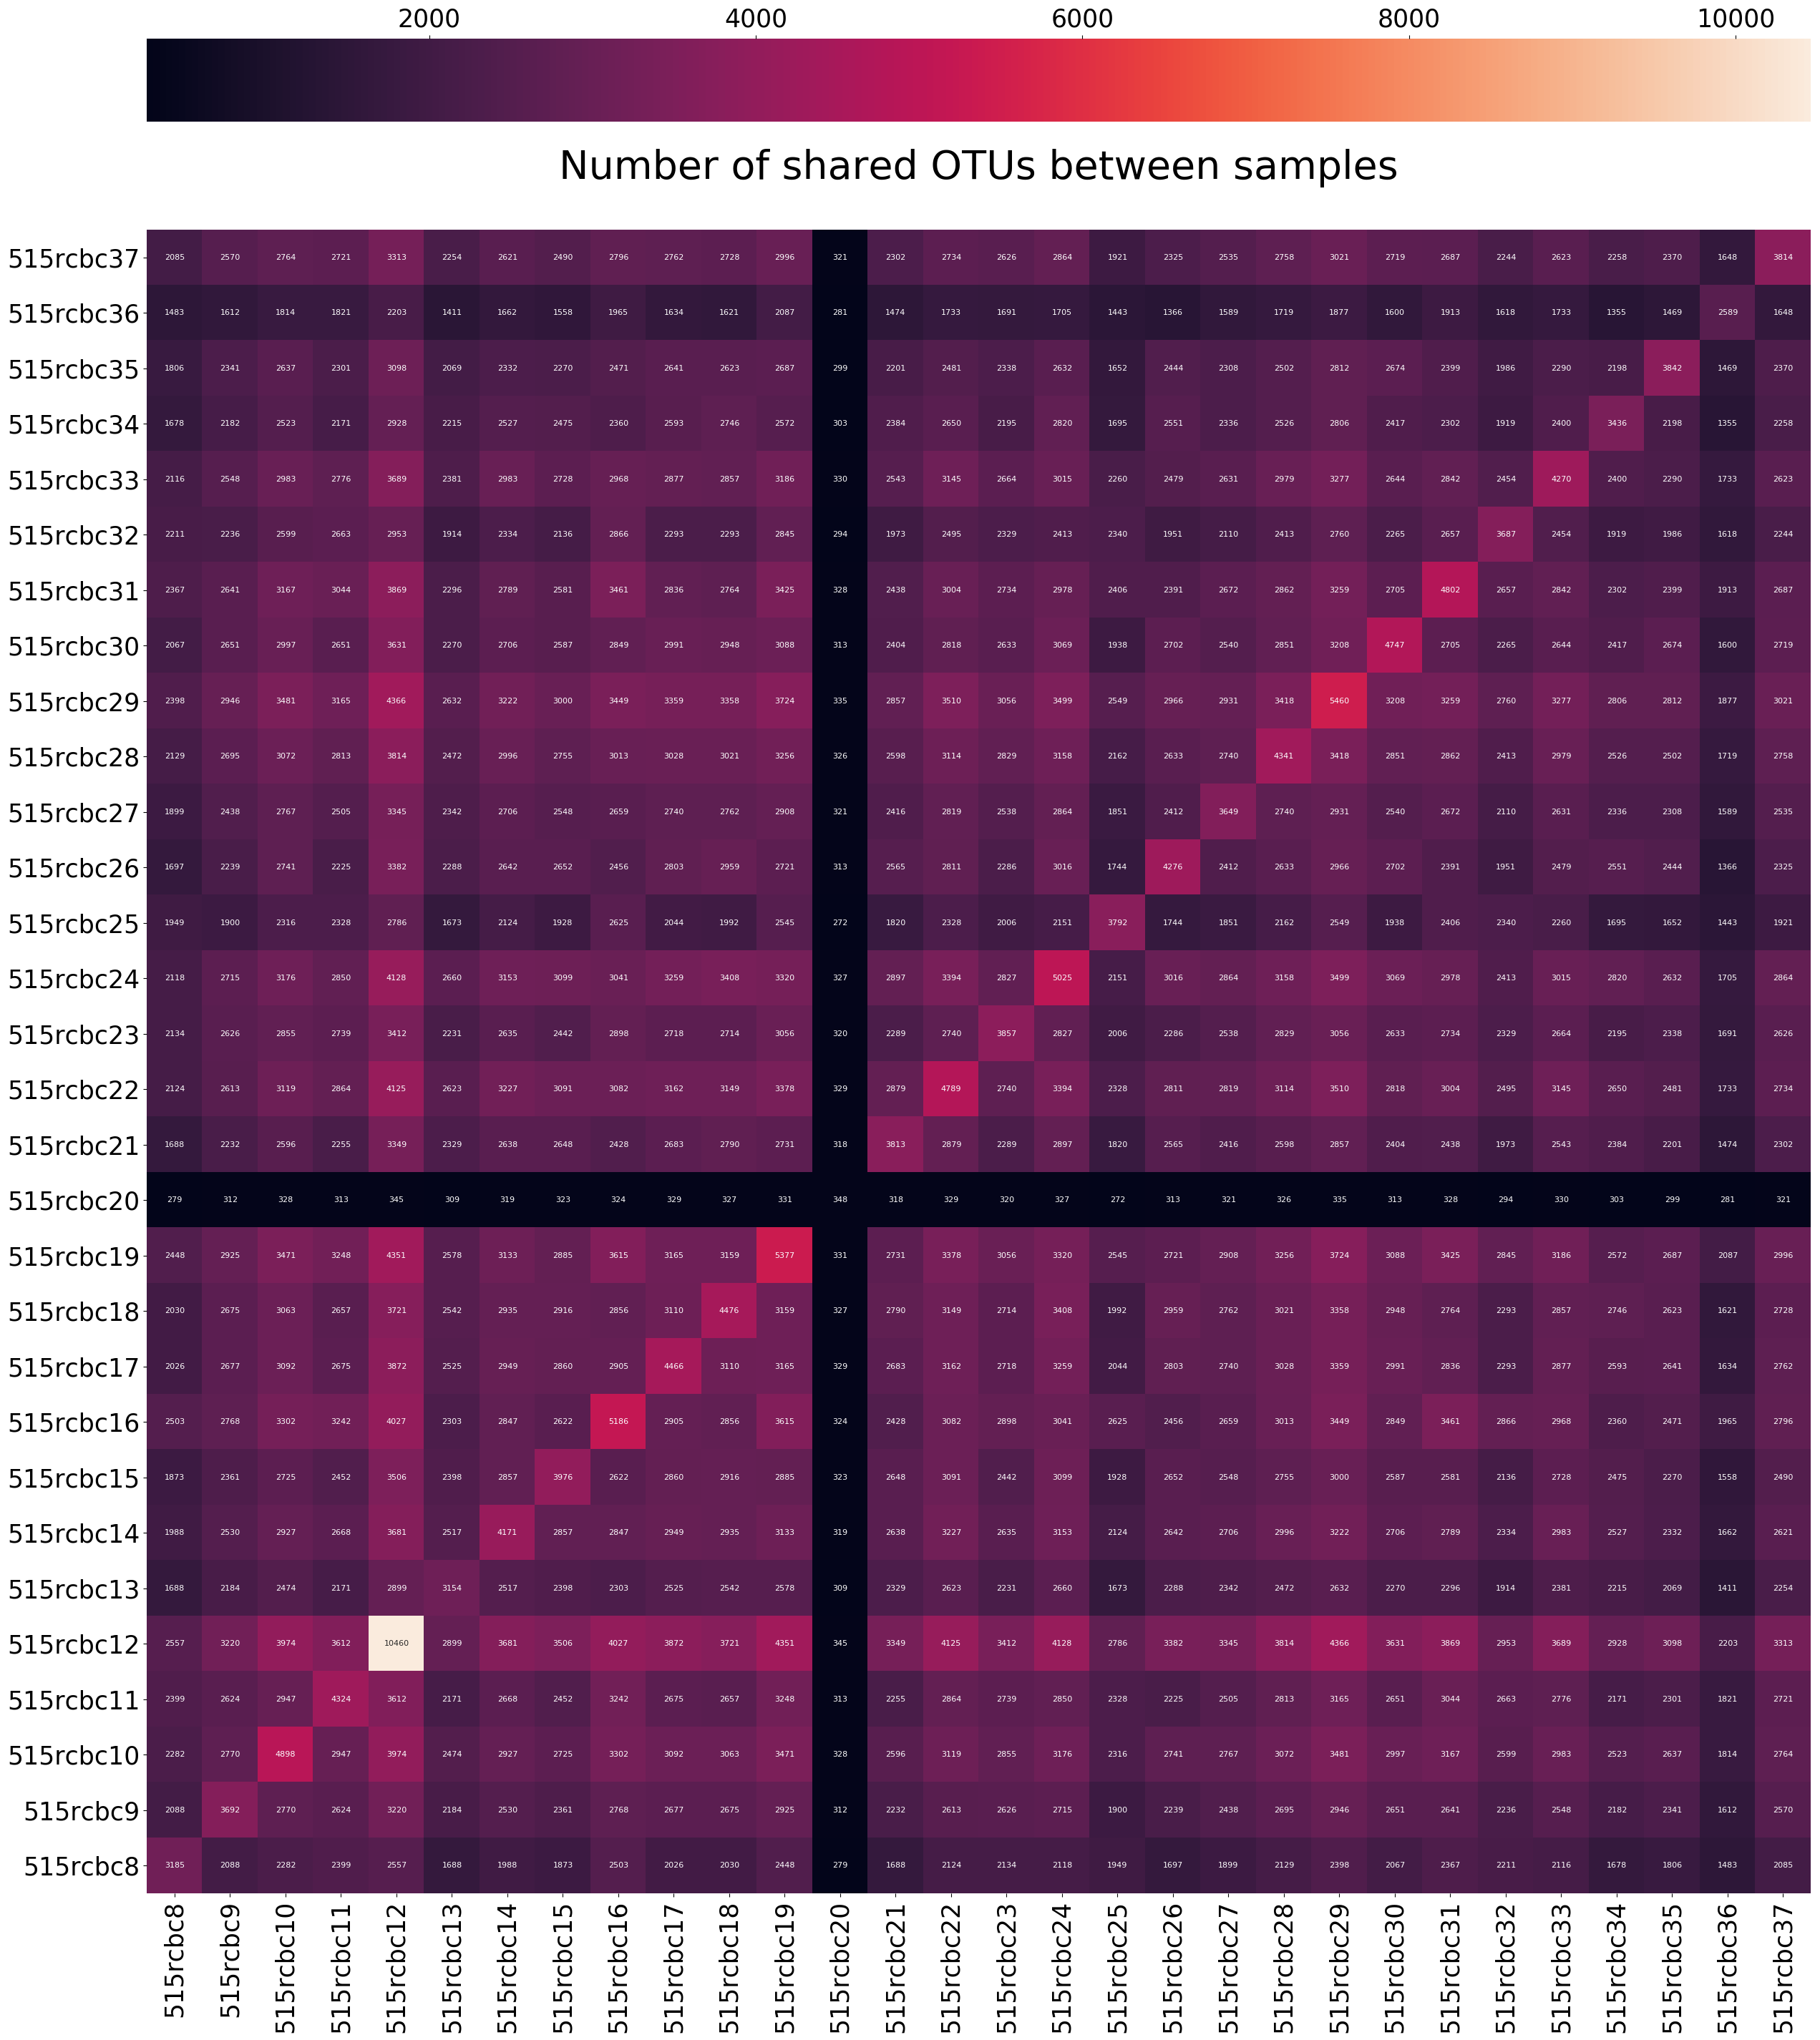

In [26]:
plot_heatmap(phylo, title="Number of shared OTUs between samples\n", 
             savename='./figs/shared_otus.png')

In [ ]:
!alpha_diversity.py \
-i otu_table.biom \
-o alphadiv.tsv \
-t rep_set.tre

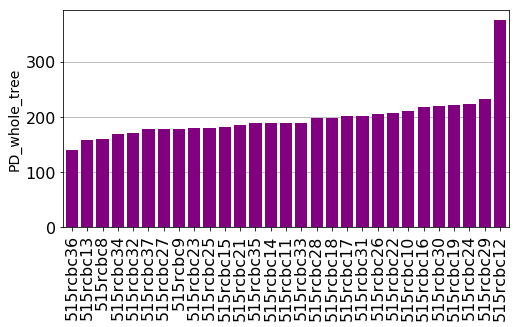

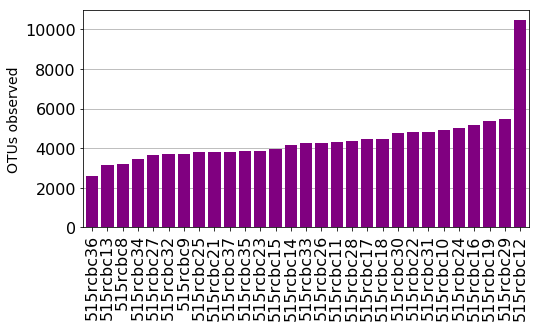

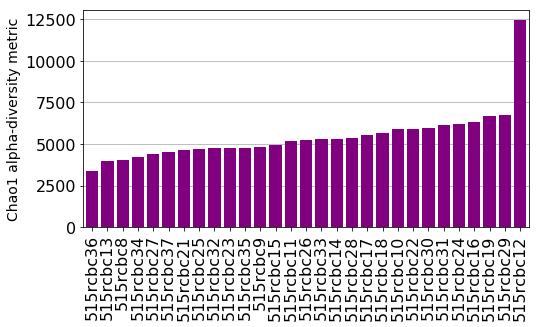

In [43]:
alpha = pd.read_csv('./alphadiv.tsv',sep='\t', index_col=0)
alpha = alpha.sort_index()
plot_bar(alpha, 'PD_whole_tree', savename='./figs/PD_alpha.png')
plot_bar(alpha, 'observed_otus', savename='./figs/observed_alpha.png', ylabel='OTUs observed')
plot_bar(alpha, 'chao1', savename='./figs/chao1_alpha.png', ylabel="Chao1 alpha-diversity metric", dpi=300)

In [ ]:
!beta_diversity.py \
-i otu_table.biom \
-o beta_diversity \
-m unweighted_unifrac,weighted_unifrac,euclidean \
-t rep_set.tre

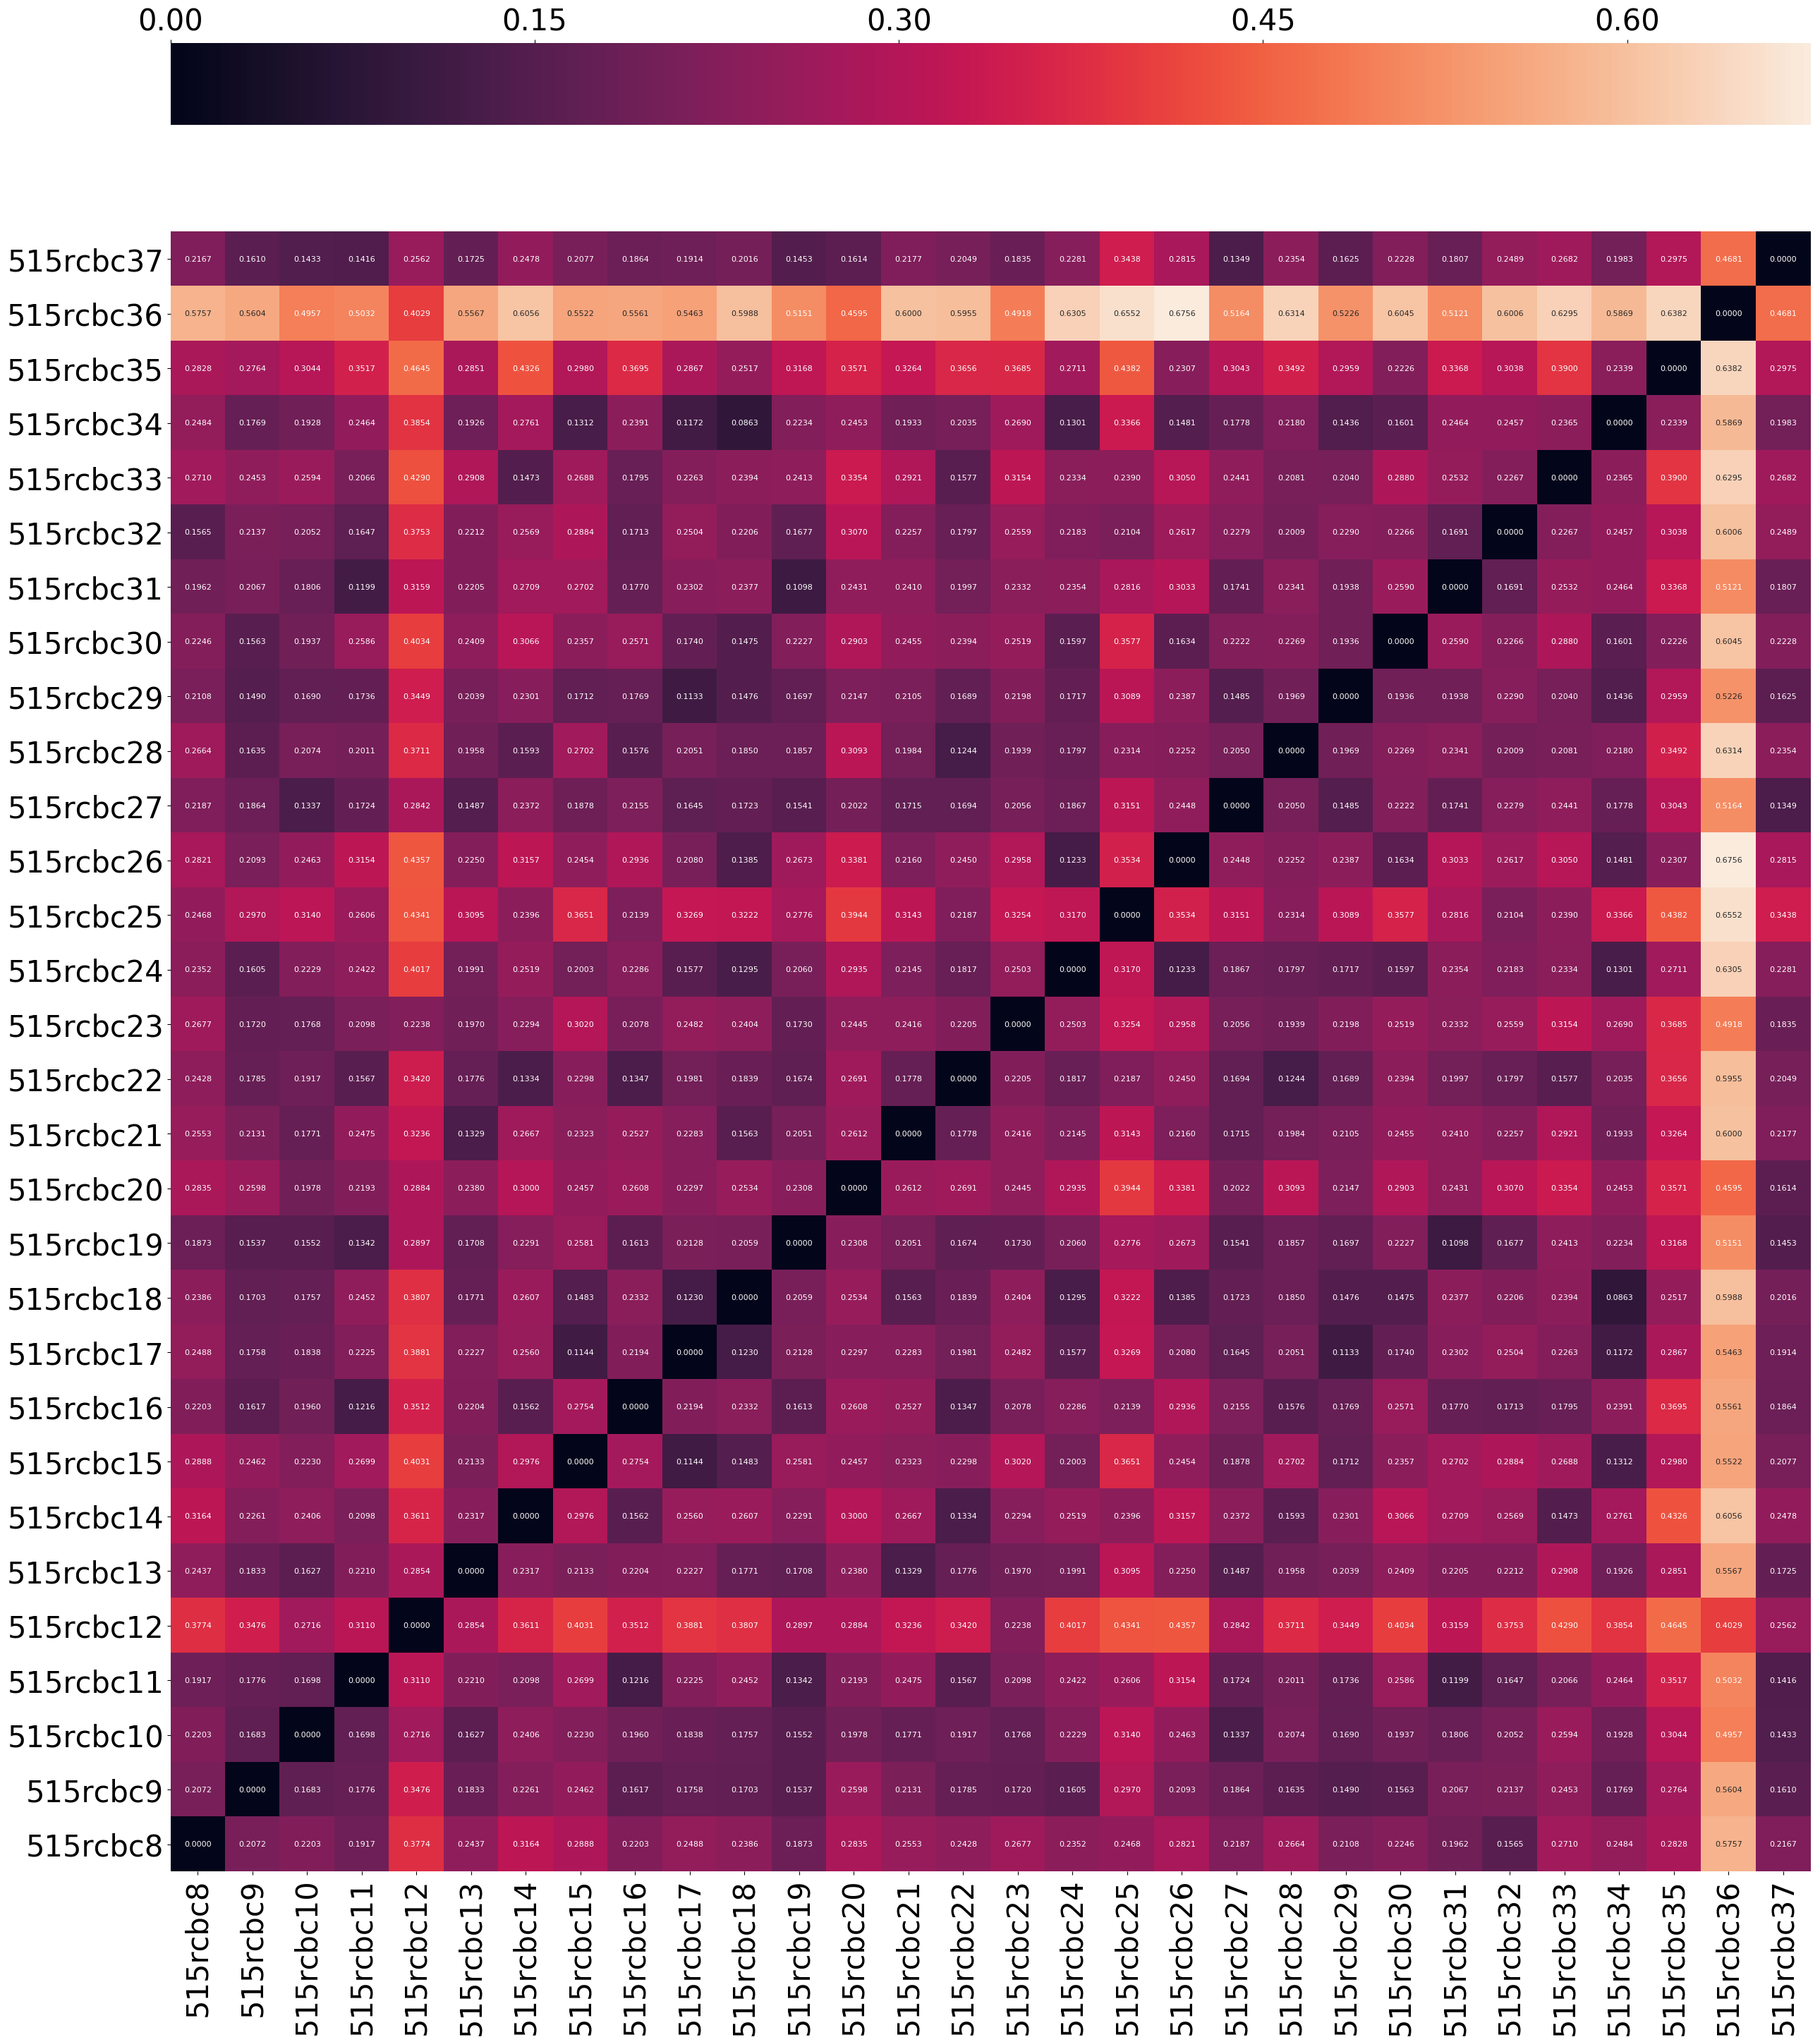

In [32]:
beta_unweight = pd.read_csv('./beta_diversity/weighted_unifrac_otu_table.txt', sep='\t', index_col=0)
beta_unweight = sort_df(beta_unweight)
plot_heatmap(beta_unweight, fmt='.4f', savename='./figs/unweighted_beta.png', cbar=True)

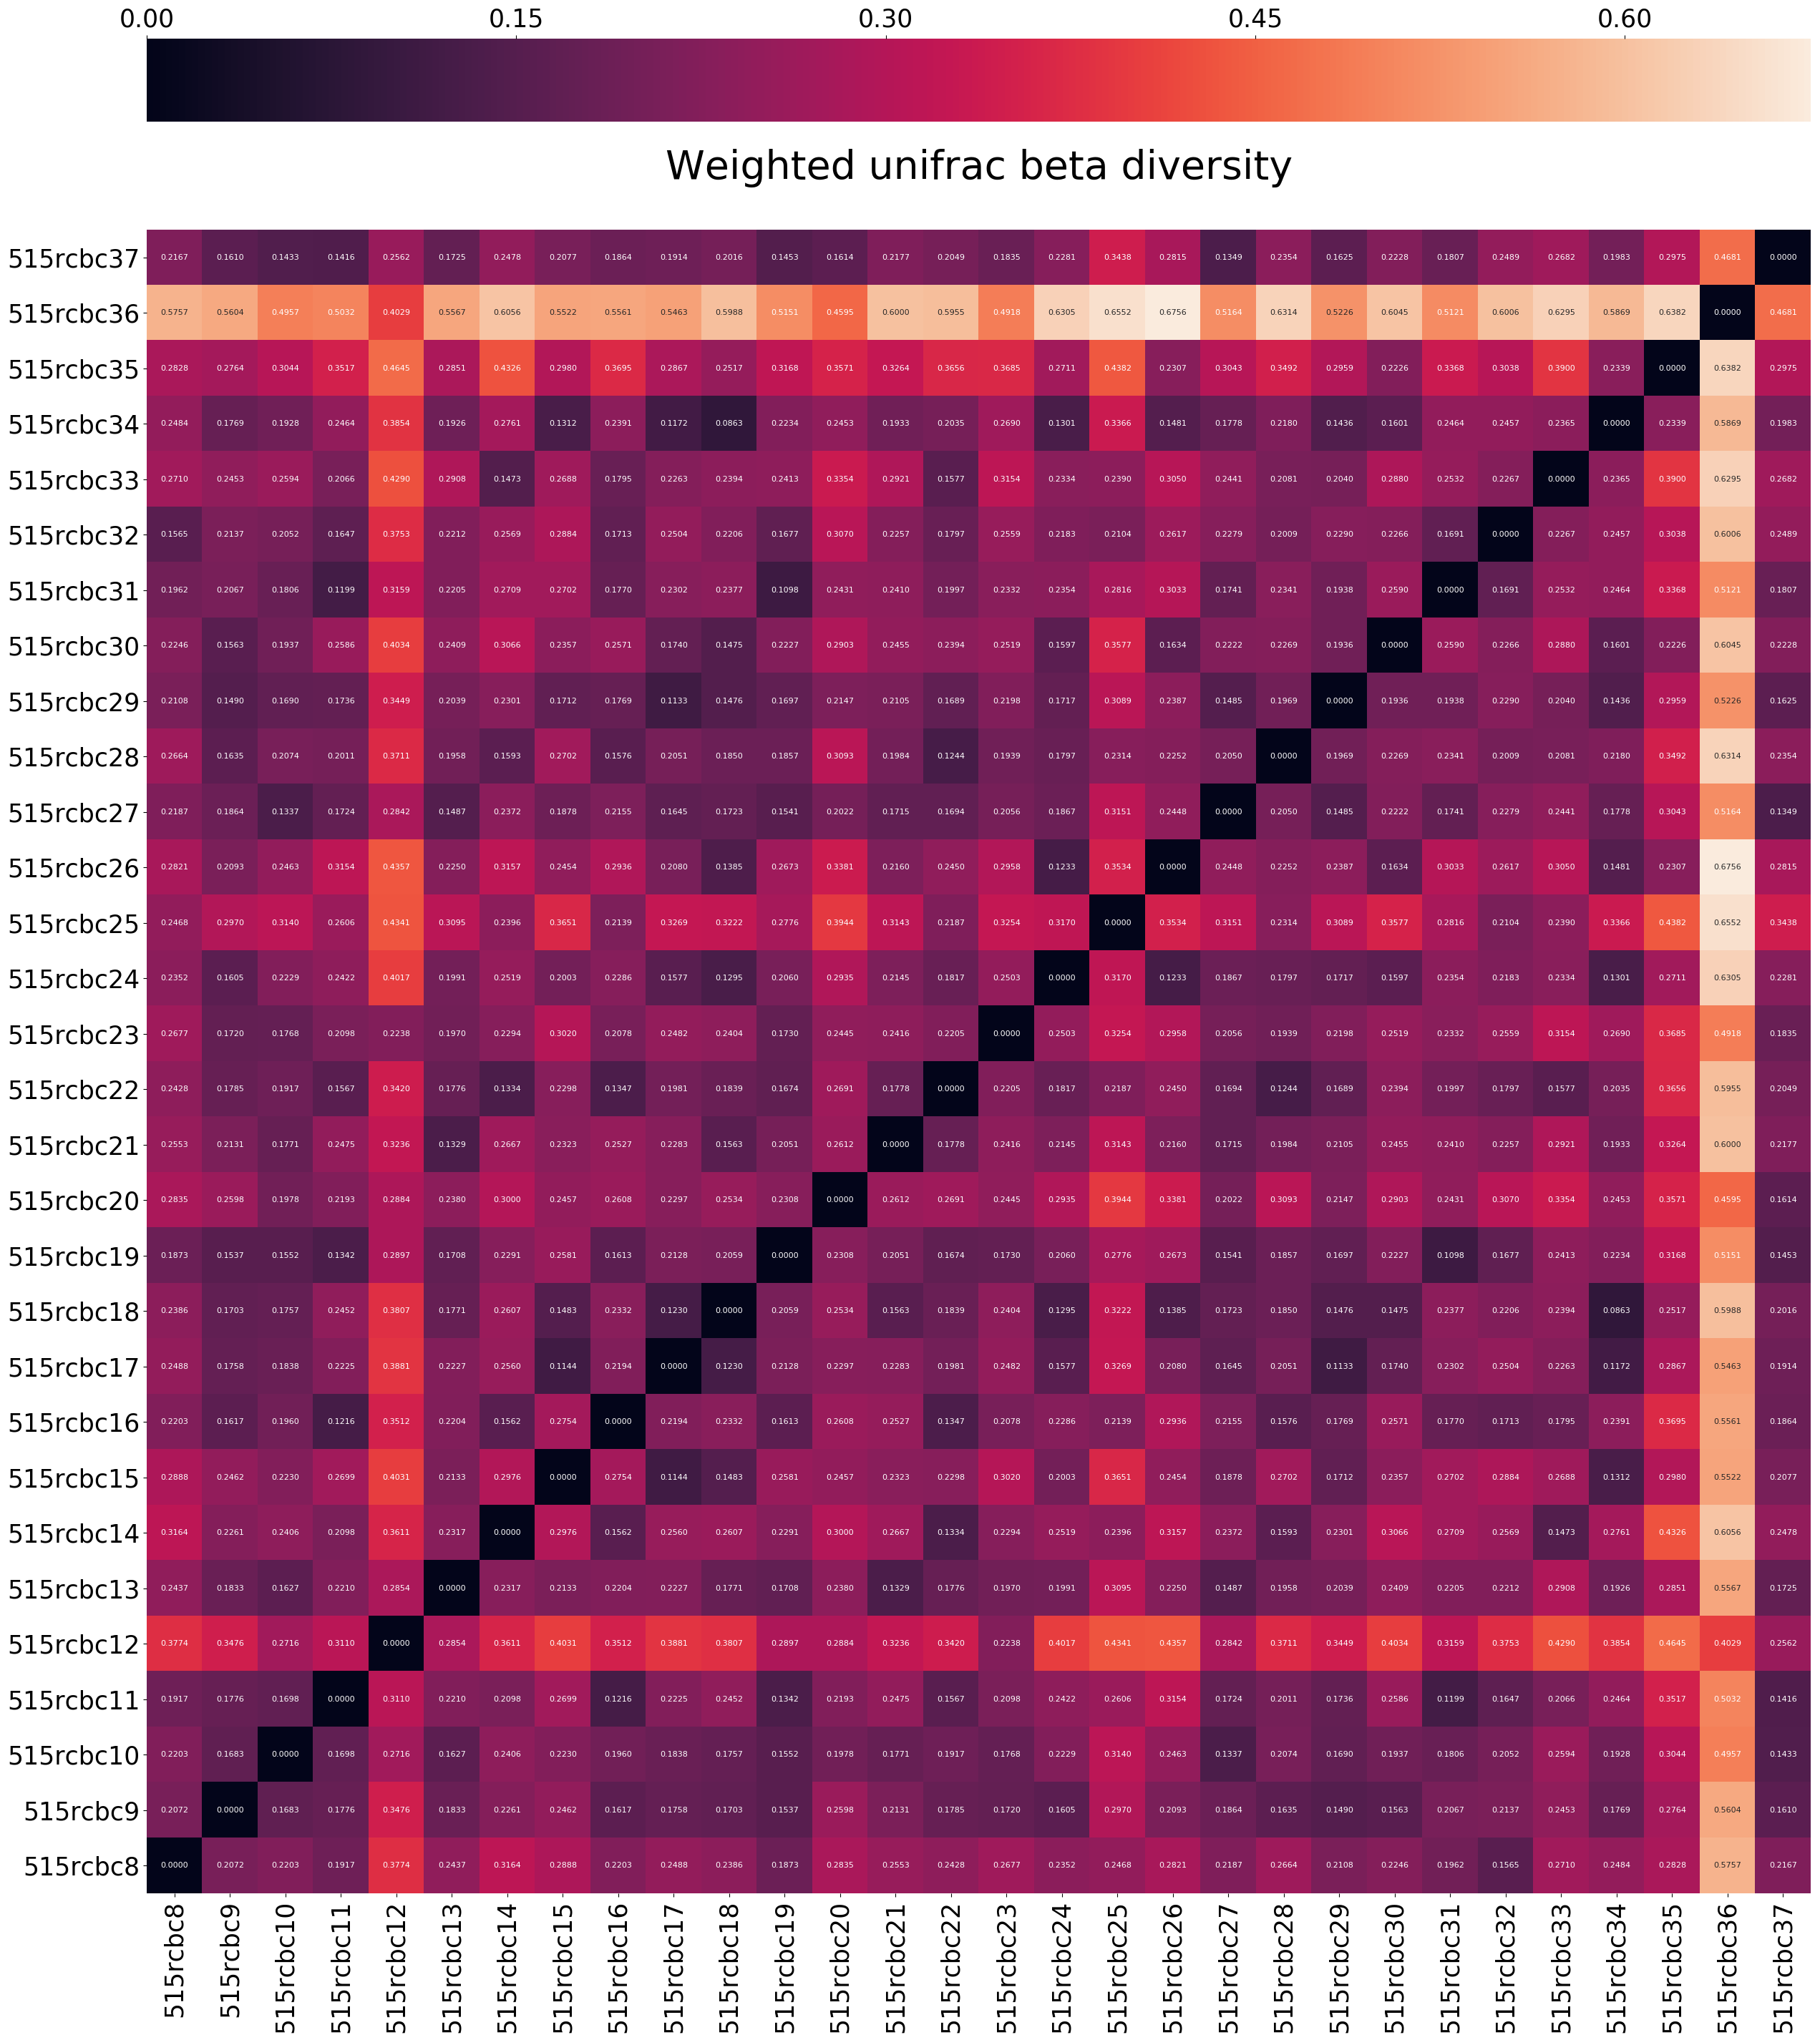

In [9]:
beta = pd.read_csv('./beta_diversity/weighted_unifrac_otu_table.txt', sep='\t', index_col=0)
beta = sort_df(beta)
plot_heatmap(beta, fmt='.4f', title='Weighted unifrac beta diversity\n', savename='./figs/weighted_beta.png', cbar=True)

,515rcbc8,515rcbc9,515rcbc10,515rcbc11,515rcbc12,515rcbc13,515rcbc14,515rcbc15,515rcbc16,515rcbc17,...,515rcbc28,515rcbc29,515rcbc30,515rcbc31,515rcbc32,515rcbc33,515rcbc34,515rcbc35,515rcbc36,515rcbc37
515rcbc37,0.216724,0.160962,0.143350,0.141634,0.256170,0.172465,0.247817,0.207693,0.186402,0.191361,...,0.235404,0.162457,0.222827,0.180724,0.248925,0.268209,0.198295,0.297498,0.468138,0.000000
515rcbc36,0.575737,0.560399,0.495748,0.503209,0.402906,0.556696,0.605631,0.552168,0.556114,0.546321,...,0.631399,0.522625,0.604526,0.512128,0.600564,0.629500,0.586894,0.638224,0.000000,0.468138
515rcbc35,0.282846,0.276385,0.304371,0.351727,0.464471,0.285072,0.432593,0.298004,0.369548,0.286658,...,0.349166,0.295909,0.222582,0.336768,0.303759,0.390039,0.233852,0.000000,0.638224,0.297498
515rcbc34,0.248421,0.176929,0.192762,0.246396,0.385407,0.192633,0.276143,0.131205,0.239065,0.117158,...,0.217991,0.143584,0.160068,0.246447,0.245712,0.236543,0.000000,0.233852,0.586894,0.198295
515rcbc33,0.270951,0.245343,0.259435,0.206613,0.429040,0.290801,0.147316,0.268802,0.179545,0.226270,...,0.208123,0.203962,0.288035,0.253230,0.226680,0.000000,0.236543,0.390039,0.629500,0.268209
515rcbc32,0.156473,0.213687,0.205242,0.164697,0.375276,0.221160,0.256889,0.288433,0.171256,0.250439,...,0.200861,0.229017,0.226601,0.169115,0.000000,0.226680,0.245712,0.303759,0.600564,0.248925
515rcbc31,0.196163,0.206737,0.180589,0.119936,0.315897,0.220542,0.270894,0.270200,0.177027,0.230216,...,0.234116,0.193807,0.259006,0.000000,0.169115,0.253230,0.246447,0.336768,0.512128,0.180724
515rcbc30,0.224643,0.156328,0.193718,0.258585,0.403417,0.240909,0.306646,0.235660,0.257132,0.174020,...,0.226862,0.193615,0.000000,0.259006,0.226601,0.288035,0.160068,0.222582,0.604526,0.222827
515rcbc29,0.210754,0.148965,0.168972,0.173572,0.344879,0.203946,0.230102,0.171176,0.176918,0.113340,...,0.196946,0.000000,0.193615,0.193807,0.229017,0.203962,0.143584,0.295909,0.522625,0.162457
515rcbc28,0.266365,0.163508,0.207433,0.201095,0.371086,0.195761,0.159277,0.270157,0.157556,0.205105,...,0.000000,0.196946,0.226862,0.234116,0.200861,0.208123,0.217991,0.349166,0.631399,0.235404


AttributeError: 'AxesSubplot' object has no attribute 'colorbar'

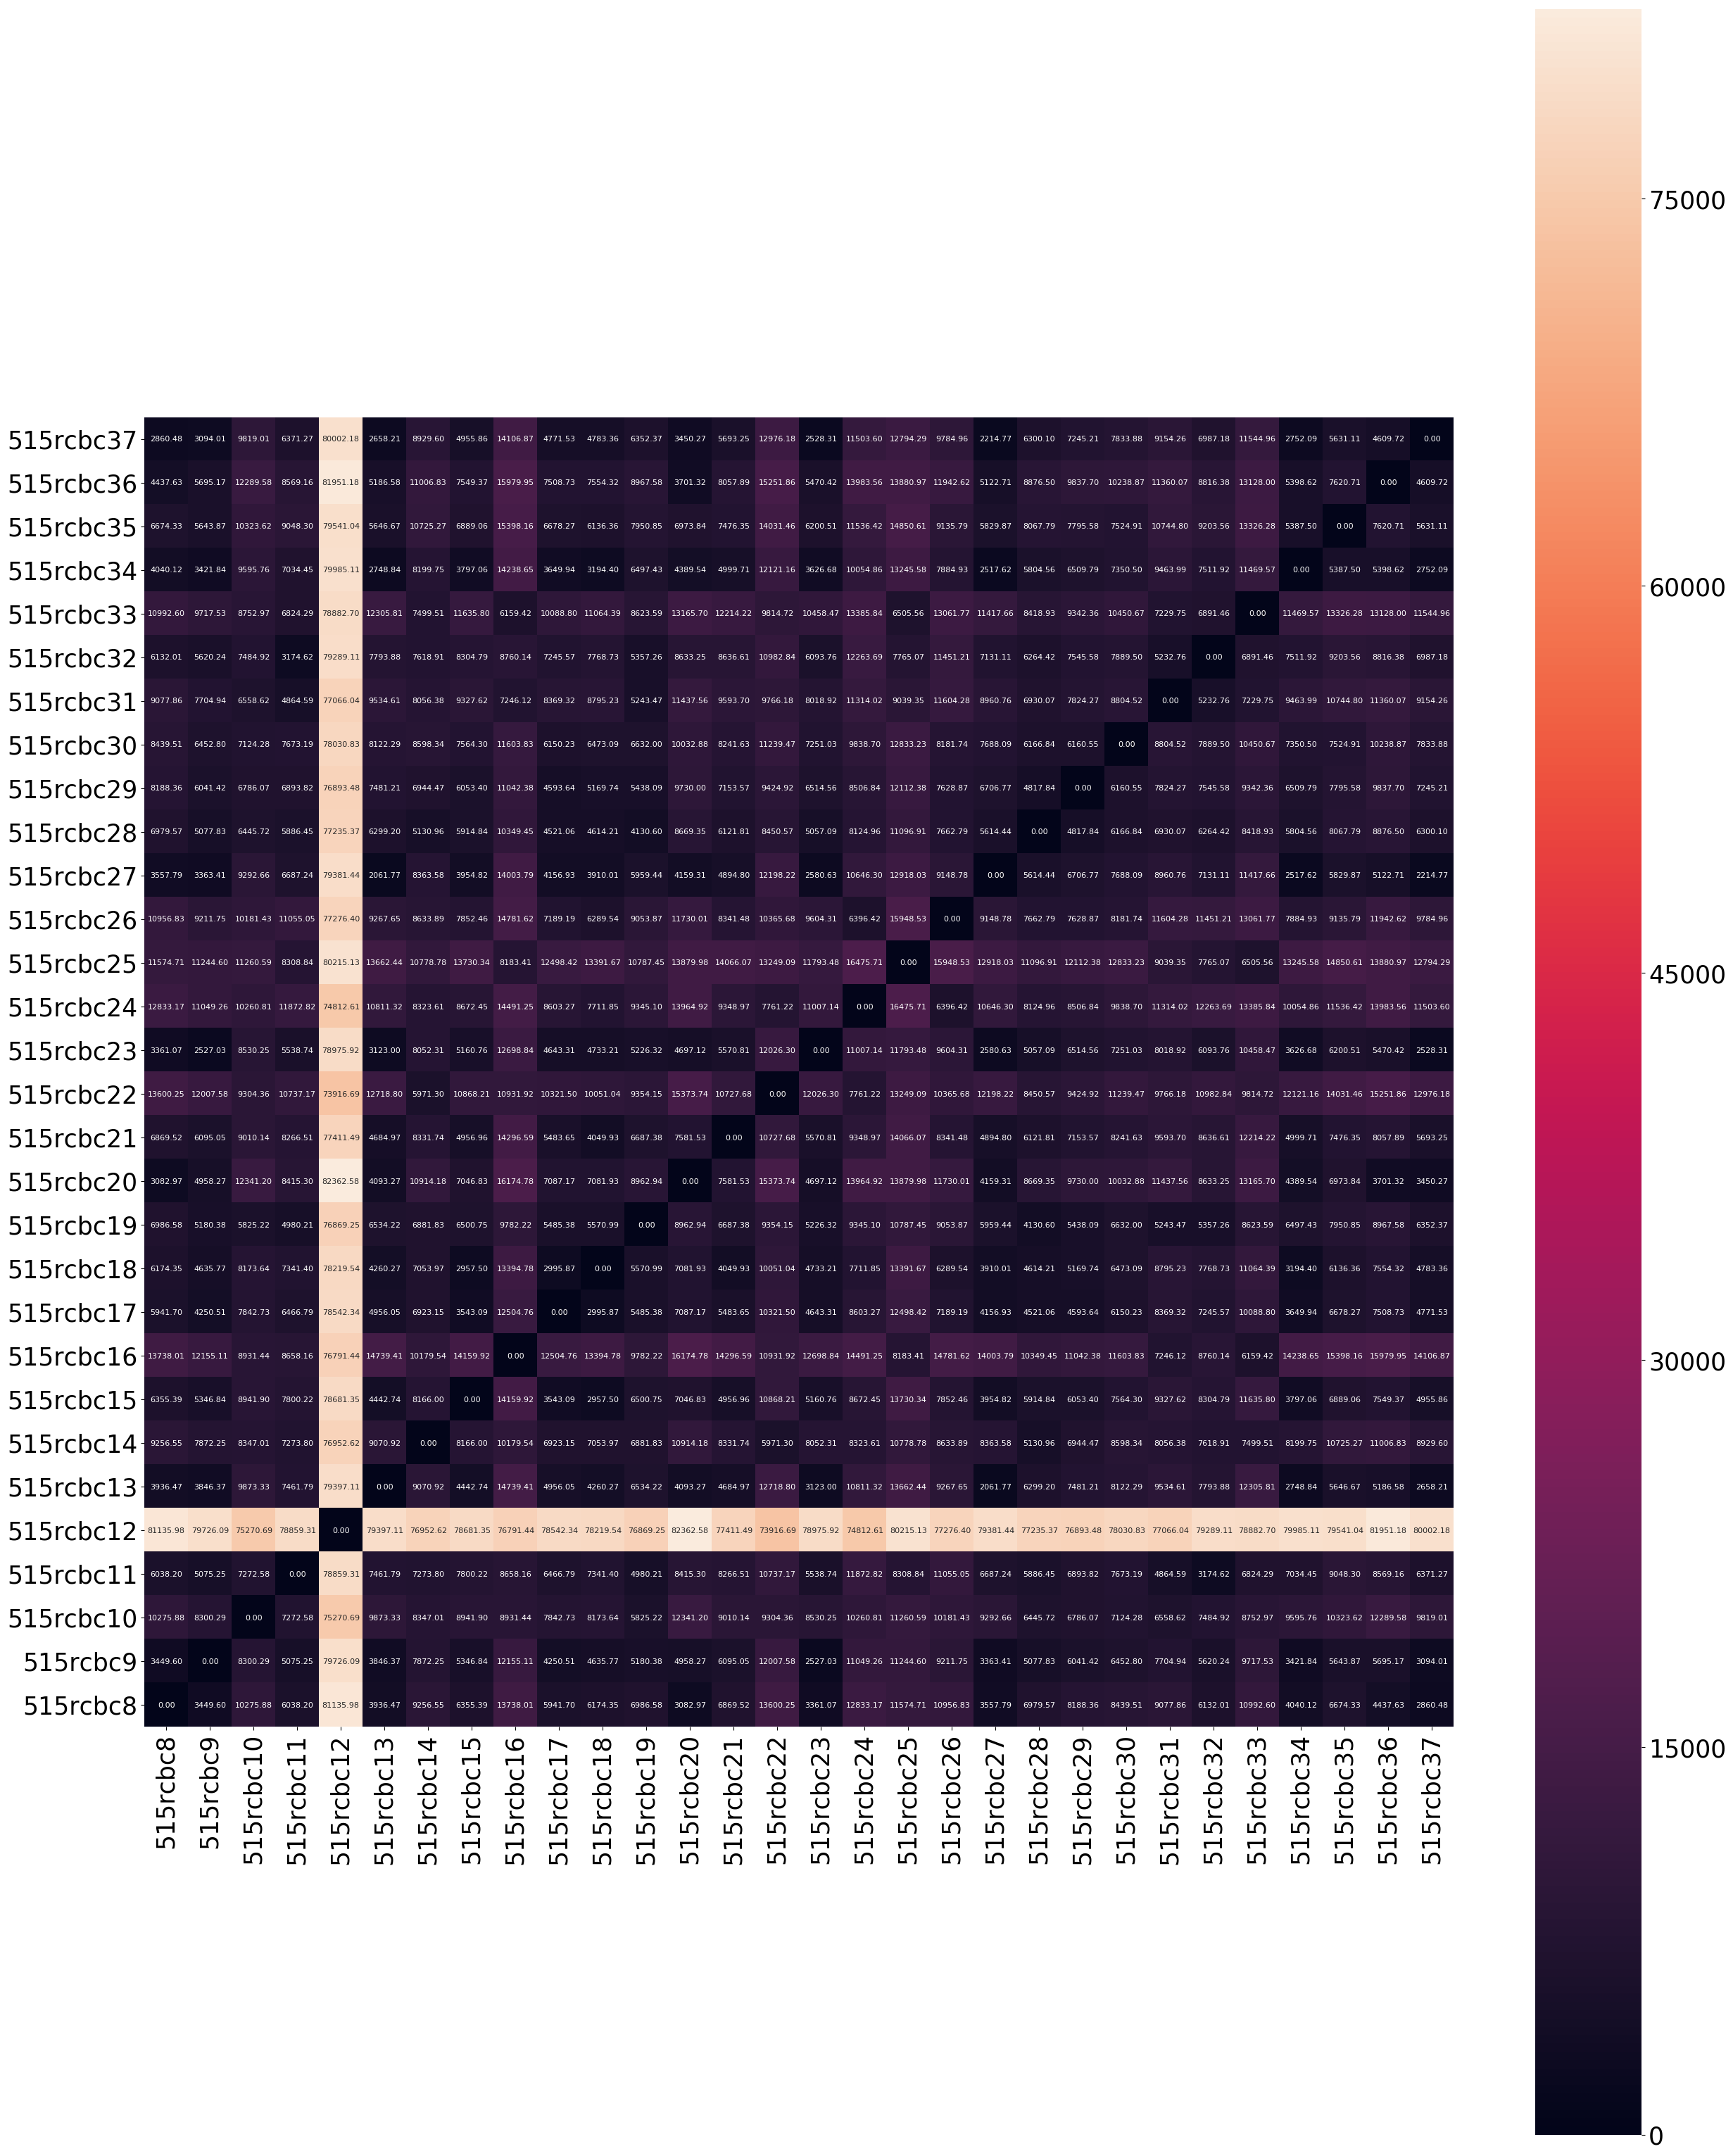

In [20]:
eucl = pd.read_csv('./beta_diversity/euclidean_otu_table.txt', sep='\t', index_col=0)
eucl = sort_df(eucl)
plot_heatmap(eucl, fmt='.2f', savename='./figs/eucl_beta.png')

In [ ]:
!observation_metadata_correlation.py \
-i otu_table.biom \
-o ./metadata_correlation/metadata_correlation_ph_pearson.tsv \
-m map.tsv \
-c SamplePh \
-s pearson
!observation_metadata_correlation.py \
-i otu_table.biom \
-o ./metadata_correlation/metadata_correlation_ph_spearman.tsv \
-m map.tsv \
-c SamplePh \
-s spearman
!observation_metadata_correlation.py \
-i otu_table.biom \
-o ./metadata_correlation/metadata_correlation_ph_kendall.tsv \
-m map.tsv \
-c SamplePh \
-s kendall

In [13]:
pears = pd.read_csv('./metadata_correlation/metadata_correlation_ph_pearson.tsv',sep='\t',index_col=0)
spear = pd.read_csv('./metadata_correlation/metadata_correlation_ph_spearman.tsv',sep='\t',index_col=0)
kend = pd.read_csv('./metadata_correlation/metadata_correlation_ph_kendall.tsv',sep='\t',index_col=0)
taxon = pears.taxonomy
pears.columns = pears.columns + '_pears'
spear.columns = spear.columns + '_spear'
kend.columns = kend.columns + '_kend'
correl = pd.concat([pears,spear,kend], axis=1)
correl = correl[correl.columns.drop(list(correl.filter(regex='taxonomy')))]
correl = pd.concat([correl, taxon], axis=1)
correl['pval_mean'] = correl[['pval_pears', 'pval_spear','pval_kend']].mean(axis=1)
correl['pval_fdr_mean'] = correl[['pval_fdr_pears', 'pval_fdr_spear','pval_fdr_kend']].mean(axis=1)
correl['pval_bon_mean'] = correl[['pval_bon_pears', 'pval_bon_spear','pval_bon_kend']].mean(axis=1)
correl

,Test stat._pears,pval_pears,pval_fdr_pears,pval_bon_pears,Test stat._spear,pval_spear,pval_fdr_spear,pval_bon_spear,Test stat._kend,pval_kend,pval_fdr_kend,pval_bon_kend,taxonomy,pval_mean,pval_fdr_mean,pval_bon_mean
AACY020170354.114.1617,-0.157178,0.410198,0.712206,1.0,-0.000343,0.998578,1.000000,1.0,-0.010287,0.957370,1.000000,1.0,D_0__Bacteria; D_1__Bacteroidetes; D_2__Bacter...,0.788715,0.904069,1.0
AACY020170993.10.1544,-0.128219,0.502900,0.734899,1.0,0.007032,0.970850,1.000000,1.0,0.015992,0.933768,1.000000,1.0,D_0__Bacteria; D_1__Proteobacteria; D_2__Delta...,0.802506,0.911633,1.0
AAEW02000008.189409.190966,-0.054421,0.777133,0.889285,1.0,0.088384,0.645188,0.917092,1.0,0.061780,0.747887,0.988290,1.0,D_0__Bacteria; D_1__Proteobacteria; D_2__Delta...,0.723403,0.931556,1.0
AAMD01000099.28240.29766,-0.073216,0.703111,0.841441,1.0,0.032727,0.864920,0.975197,1.0,0.025649,0.893950,1.000000,1.0,D_0__Bacteria; D_1__Proteobacteria; D_2__Delta...,0.820660,0.938879,1.0
AANZ01000021.102759.104249,0.218891,0.247641,0.712206,1.0,0.230992,0.221583,0.907807,1.0,0.205527,0.278640,0.980950,1.0,D_0__Bacteria; D_1__Planctomycetes; D_2__Planc...,0.249288,0.866988,1.0
AATN01001290.251.1721,-0.051999,0.786825,0.889285,1.0,0.077751,0.685609,0.919364,1.0,0.072616,0.705439,0.980950,1.0,D_0__Bacteria; D_1__Proteobacteria; D_2__Alpha...,0.725958,0.929867,1.0
AATO01000250.4290.5782,-0.156657,0.411775,0.712206,1.0,-0.109996,0.566049,0.907807,1.0,-0.097870,0.609925,0.980950,1.0,D_0__Bacteria; D_1__Bacteroidetes; D_2__Bacter...,0.529250,0.866988,1.0
AATU01012341.11185.12673,-0.049358,0.797427,0.889285,1.0,0.000000,1.000000,1.000000,1.0,0.000000,1.000000,1.000000,1.0,D_0__Bacteria; D_1__Proteobacteria; D_2__Alpha...,0.932476,0.963095,1.0
AAWL01000016.11005.12605,-0.210307,0.267284,0.712206,1.0,-0.241992,0.199536,0.907807,1.0,-0.215314,0.255709,0.980950,1.0,D_0__Bacteria; D_1__Firmicutes; D_2__Negativic...,0.240843,0.866988,1.0
AAXU02000001.1612715.1614224,-0.156657,0.411775,0.712206,1.0,-0.109996,0.566049,0.907807,1.0,-0.097870,0.609925,0.980950,1.0,D_0__Bacteria; D_1__Bacteroidetes; D_2__Bacter...,0.529250,0.866988,1.0


In [14]:
correl[['taxonomy', 'pval_mean', 'pval_fdr_mean', 'pval_bon_mean', 'Test stat._pears', 'Test stat._spear', 'Test stat._kend']].sort_values('pval_mean')

,taxonomy,pval_mean,pval_fdr_mean,pval_bon_mean,Test stat._pears,Test stat._spear,Test stat._kend
HM187283.1.1511,D_0__Bacteria; D_1__Planctomycetes; D_2__Pla4 ...,0.001630,0.866988,1.0,0.591937,0.588403,0.503063
KY190578.1.1416,D_0__Bacteria; D_1__Chloroflexi; D_2__Dehaloco...,0.004708,0.866988,1.0,0.556820,0.533620,0.453479
FPLL01004497.15.1491,D_0__Bacteria; D_1__Chloroflexi; D_2__TK10; Am...,0.006157,0.866988,1.0,0.508848,0.539592,0.443743
AF293012.1.1505,D_0__Bacteria; D_1__Nitrospirae; D_2__Nitrospi...,0.007717,0.866988,1.0,0.444942,0.589011,0.459913
MEVL01000015.4457.6018,D_0__Bacteria; D_1__Verrucomicrobia; D_2__Verr...,0.008646,0.866988,1.0,0.410136,0.619896,0.528977
HQ190564.1.1509,D_0__Bacteria; D_1__Proteobacteria; D_2__Gamma...,0.009696,0.866988,1.0,0.459195,0.518119,0.431930
EU335205.1.1524,D_0__Bacteria; D_1__Proteobacteria; D_2__Delta...,0.010136,0.866988,1.0,0.435880,0.570983,0.438772
EU135415.1.1315,D_0__Bacteria; D_1__Verrucomicrobia; D_2__Verr...,0.011417,0.866988,1.0,0.475033,0.530827,0.406817
JQ428743.1.1452,D_0__Bacteria; D_1__Proteobacteria; D_2__Alpha...,0.012031,0.866988,1.0,0.527848,0.504746,0.395092
EF559008.1.1441,D_0__Bacteria; D_1__Firmicutes; D_2__Clostridi...,0.013022,0.866988,1.0,0.433322,0.486975,0.427992


In [31]:
mapping = pd.read_csv('./map.tsv', sep='\t', index_col=0)
mapping.replace({'Trace':1,
                 'Trace-Low':3,
                'Low': 10,
                 'Low-Medium':31,
                'Medium': 100,
                 'Medium-High':310,
                'High': 1000}, inplace=True)
mapping.to_csv('./exponential_map.tsv', sep='\t')
mapping

,BarcodeSequence,LinkerPrimerSequence,SampleType,Year,Month,Day,SampleLongitude,SampleLatitude,SampleSiteDescription,SampleDepth,SampleFootFall,SampleVegetation,SampleWeatherTemp,SampleMoisture,SampleDescription,SamplePh,SamplePotassium,SampleNitrogen,SamplePhosphorus,Description
#SampleID,,,,,,,,,,,,,,,,,,,,
515rcbc8,GACTCAACCAGT,GTGYCAGCMGCCGCGGTAA,soil,2017,10,17,51.524800,-0.131000,"no grass, close to a tree, some roots were gro...",12.5,none,none,15,dry,Very dry and powder like. There were a few sto...,5.0,100,1,1000,team1
515rcbc9,GCCTCTACGTCG,GTGYCAGCMGCCGCGGTAA,soil,2017,10,17,51.524770,-0.131220,"sample taken between two trees, leaves on grou...",10.0,none,none,15,dry,"dry, stony, crumbly, hard",5.6,1,1,10,team2
515rcbc10,ACTACTGAGGAT,GTGYCAGCMGCCGCGGTAA,soil,2017,10,17,51.524114,-0.131286,"Underneath a log. Many woodlice, millipedes, s...",10.0,none,none,15,dry,"Fairly compact. Mostly soil, few small rocks. ...",9.0,1,100,100,team3
515rcbc11,AATTCACCTCCT,GTGYCAGCMGCCGCGGTAA,soil,2017,10,17,51.524500,-0.131600,"shrubs, away from footpaths; three nearby plan...",9.5,none,shrubs,14,moist,"heavy - sticks together and difficult to dig, ...",5.0,1,10,1000,team4
515rcbc12,CGTATAAATGCG,GTGYCAGCMGCCGCGGTAA,soil,2017,10,17,51.535722,-0.159251,"Regents canal, around 1m away from the water. ...",3.0,none,none,14,moist,"Dark brown colour, solid, probably contains clay",5.5,100,1,100,team5
515rcbc13,ATGCTGCAACAC,GTGYCAGCMGCCGCGGTAA,soil,2017,10,17,51.524530,-0.131230,"1m away from the footpath, 5m away from a tree",11.5,none,grass,15,moist,"Dark, moist, semi-compact soil. Small rocks. R...",5.5,10,10,100,team6
515rcbc14,ACTCGCTCGCTG,GTGYCAGCMGCCGCGGTAA,soil,2017,10,17,51.524610,-0.131030,"Approx. 2.5m from footpath and 10m from road, ...",10.5,none,grass,15,dry,"Crumbly, dry, coarse, mostly soil and a few sm...",5.5,1,1,10,team7
515rcbc15,TTCCTTAGTAGT,GTGYCAGCMGCCGCGGTAA,soil,2017,10,17,51.524400,-0.130900,"Open field, over 2 metres from foot paths, tre...",7.0,none,grass,14,moist,Medium loam,5.0,100,1,100,team8
515rcbc16,CGTCCGTATGAA,GTGYCAGCMGCCGCGGTAA,soil,2017,10,17,51.524570,-0.130640,1m from a big tree next to a bench,15.0,none,shrubs,14,moist,"dark brown, fine with some pebbles.",5.5,1,1,10,team9


In [37]:
%%bash
echo "ANOSIM comparison of categories" > categories.txt
for f in Ph Potassium Nitrogen Phosphorus; do
compare_categories.py \
--method anosim \
-i ./beta_diversity/unweighted_unifrac_otu_table.txt \
-m exponential_map.tsv \
-c Sample$f \
-o categories
echo "" >> ./categories.txt
echo $f >> ./categories.txt
cat ./categories/anosim_results.txt >> ./categories.txt
done
rm -r ./categories/
cat categories.txt

ANOSIM comparison of categories

Ph
method name	ANOSIM
test statistic name	R
sample size	30
number of groups	8
test statistic	-0.10911111111111106
p-value	0.84699999999999998
number of permutations	999

Potassium
method name	ANOSIM
test statistic name	R
sample size	30
number of groups	5
test statistic	0.2236809876059373
p-value	0.031
number of permutations	999

Nitrogen
method name	ANOSIM
test statistic name	R
sample size	30
number of groups	6
test statistic	0.12027173913043475
p-value	0.11799999999999999
number of permutations	999

Phosphorus
method name	ANOSIM
test statistic name	R
sample size	30
number of groups	6
test statistic	0.2006074560329201
p-value	0.055
number of permutations	999


In [3]:
!neighbor_joining.py -i ./beta_diversity/weighted_unifrac_otu_table.txt -o ./beta_diversity/diversity_tree.tre

Traceback (most recent call last):
  File "/home/ilya/miniconda3/envs/qiime1/bin/neighbor_joining.py", line 4, in <module>
    __import__('pkg_resources').run_script('qiime==1.9.1', 'neighbor_joining.py')
  File "/home/ilya/miniconda3/envs/qiime1/lib/python2.7/site-packages/pkg_resources/__init__.py", line 658, in run_script
    self.require(requires)[0].run_script(script_name, ns)
  File "/home/ilya/miniconda3/envs/qiime1/lib/python2.7/site-packages/pkg_resources/__init__.py", line 1438, in run_script
    exec(code, namespace, namespace)
  File "/home/ilya/miniconda3/envs/qiime1/lib/python2.7/site-packages/qiime-1.9.1-py2.7.egg-info/scripts/neighbor_joining.py", line 14, in <module>
    from qiime.util import parse_command_line_parameters
  File "/home/ilya/miniconda3/envs/qiime1/lib/python2.7/site-packages/qiime/util.py", line 41, in <module>
    from biom.util import compute_counts_per_sample_stats, biom_open, HAVE_H5PY
  File "/home/ilya/miniconda3/envs/qiime1/lib/python2.7/site-pa